# L'influence des promotions sur les ventes d'un supermarché 

Auteurs : Jarod Vanderlynden , Philippe Mathieu, [CRISTAL Lab](http://www.cristal.univ-lille.fr), [SMAC team](https://www.cristal.univ-lille.fr/?rubrique27&eid=17), [Lille University](http://www.univ-lille.fr), Romain Warlop, [fifty-five](https://www.fifty-five.com/fr/)

email : jarod.vanderlynden.etu@univ-lille.fr

Création : 5/12/2022


***
## Introduction

Dans cette feuille jupyter nous reproduisons la plupart des résultats des expérimentations de l'article _"Comprendre l'impact des stratégies de prix sur le comportement des consommateurs"_.

La présentation du modèle est faite dans la feuille jupyter _Get\_Started_ 

***

### L’augmentation du volume des ventes

Une expérimentation représente 20 simulations, on réalise une expérimentation sans promotion et une avec promotion, sur un SMA contenant les mêmes agents et les mêmes packs. 

In [4]:
from src.model import *
import seaborn as sns
sns.set_theme()

In [6]:
# Figure1 : une exp classique sans promotion
# Lancer cette cellule peut prendre du temps. (Plusieurs minutes)
drevenues = {}
dproducts = {}
for i in range(20):
    print(i,end=" ")
    np.random.seed(0) # Graine aléatoire fixé pour la génération des packs et des agents afin d'avoir les mêmes sur toutes les simulations.
    test = generate_pack_categorie("bananes") # Création de la catégorie de packs
    sma = SMA([test],300,100)
    sma.initialize()
    sma.makePromo(0,10,(30,34),"bananes","bananes0")
    np.random.seed(int(10000 * time.time()) % 2**32) #On réintègre de l'aléatoire avant de lancer la simulation.
    sma.run()
    drevenues[i] = sma.revenues
    j=0
    for pack in sma.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [7]:
#Figure2 : la même experience, mais avec une promotion de 40% des prix sur le produit 0
# Lancer cette cellule peut prendre du temps. (Plusieurs minutes)
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    np.random.seed(0)
    test = generate_pack_categorie("bananes") # Création de la catégorie de packs
    sma2 = SMA([test],300,100)
    sma2.initialize()
    sma2.makePromo(0,40,(30,34),"bananes","bananes0")
    np.random.seed(int(10000 * time.time()) % 2**32)
    sma2.run()
    drevenues2[i] = sma.revenues
    j=0
    for pack in sma2.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma2.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

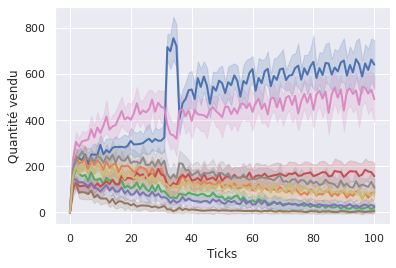

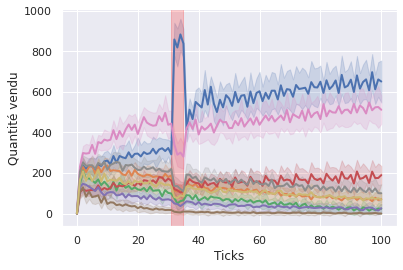

In [8]:
# Code nécessaire au cumul des simulations pour tracer les courbes

for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantité vendu")
plt.xlabel("Ticks")
# plt.savefig("NbAcheteurs0.svg",bbox_inches='tight')
plt.show()


for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantité vendu")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
# plt.savefig("NbAcheteurs1.svg",bbox_inches='tight')
# plt.savefig("VolumeDesVentes.svg")

Sur cette figure pour une réduction de 40% du prix, nous observons en moyenne une augmentation de 50% du volume des ventes sur le produit en promotion.

### Impact des promotions répétées

Nous proposons de réaliser 3 expériences de 20 simulations chacune.

-Sans promotion

-Avec 5 promotions successives à 20%

-Avec 5 promotions successives à 50%

In [29]:
# Definition d'une fonction qui nous servira à afficher nos résultats.
def my_plot(df):
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    plt.plot(df.index ,df.moy)
    plt.fill_between(df.index ,df.moy-(df.ecart), df.moy+(df.ecart),alpha=0.2)
    return 0

In [30]:
# Données récupérer au cours des simulations.
# Lancer cette cellule peut prendre du temps. (Plusieurs minutes)
dfmeanPrice1 = pd.DataFrame()
dfmeanPrice2 = pd.DataFrame()
dfmeanPrice3 = pd.DataFrame()
#Nombre d'expériences à réaliser 
for i in range(20):
    print(i, end=' ')
    
    # Création des SMA
    np.random.seed(3)
    test = generate_pack_categorie("bananes") # Création de la catégorie de packs
    sma1 = SMA([test],300,100)
    sma1.initialize()
    sma2 = SMA([test],300,100)
    sma2.initialize()
    sma3 = SMA([test],300,100)
    sma3.initialize()

    # Promotions
    sma2.makePromo(0,20,(10,14),"bananes","bananes0")
    sma2.makePromo(0,20,(20,24),"bananes","bananes0")
    sma2.makePromo(0,20,(30,34),"bananes","bananes0")
    sma2.makePromo(0,20,(40,44),"bananes","bananes0")
    sma2.makePromo(0,20,(50,54),"bananes","bananes0")

    sma3.makePromo(0,50,(10,14),"bananes","bananes0")
    sma3.makePromo(0,50,(20,24),"bananes","bananes0")
    sma3.makePromo(0,50,(30,34),"bananes","bananes0")
    sma3.makePromo(0,50,(40,44),"bananes","bananes0")
    sma3.makePromo(0,50,(50,54),"bananes","bananes0")

    # Simulations
    np.random.seed(int(10000 * time.time()) % 2**32)
    sma1.run()
    sma2.run()
    sma3.run()
    
    #Enregistrement des résultats
    for cat in sma1.packs_categories:
        dfmeanPrice1.insert(i,cat.name+str(i),sma1.getMeanNeeds()[cat.name])
        dfmeanPrice2.insert(i,cat.name+str(i),sma2.getMeanNeeds()[cat.name])
        dfmeanPrice3.insert(i,cat.name+str(i),sma3.getMeanNeeds()[cat.name])

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

[]

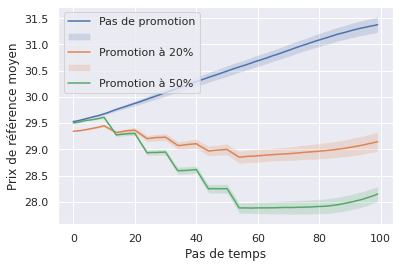

In [31]:
#Code nécessaire à l'affichage
#Comme on a qu'une seul catégorie l'affichage est plus simple
my_plot(dfmeanPrice1)
my_plot(dfmeanPrice2)
my_plot(dfmeanPrice3)
plt.legend(["Pas de promotion","","Promotion à 20%","","Promotion à 50%"])
plt.ylabel("Prix de référence moyen")
plt.xlabel("Pas de temps")
# plt.savefig("PrixRefMoyen.svg",bbox_inches='tight')
plt.plot()

On observe que durant différentes promotions, il y a une réduction du prix référence des agents. On peut en conclure que la perception moyenne des différents produits change à cause de la promotion. Les agents sont plus attirés par des produits peu coûteux après une promotion. 

### L’acquisition et la rétention de nouveaux clients

Une simulation afin de montrer que la promotion permet dans ce modèle d'acquérir de nouveaux clients via une augmentation du nombre de ventes et d'acheteurs mais aussi de fidéliser une partie de ces clients. 

In [32]:
np.random.seed(3)
test = generate_pack_categorie("bananes")
sma = SMA([test],300,100)
sma.initialize()
sma.makePromo(0,40,(30,34),"bananes","bananes0")
sma.run()

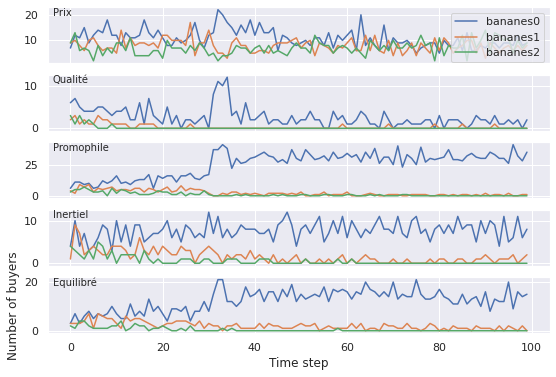

In [33]:
sma.showProfileSales()

La promotion démarre au pas de temps 30 et se termine au pas de temps 34. On observe que les agents promophiles sont plus impactés par la promotion que les autres agents. De plus on observe une fidélisation (augmentation long terme du nombre d'acheteurs alors qu'il n'y a plus de promotion) sur certains profils notamment sur les profils promophiles. 

### Guerre des prix

On génère 2 produits assez similaires, l'un porté sur la qualité, l'autre sur le prix. On peut aussi imaginer deux produits très différents en terme de prix/qualité ou encore 2 produits encore plus similaires. Ces caractéristiques auront un impact sur les courbes que nous allons observer. Le but ici est de présenter une guerre des prix, avec des baisses successives du prix des produits. 

Dans un premier temps la méthode `SMA.get_favorites()` permet de récupérer pour chaque produit le nombre d'agents ayant ce produit comme favori à chaque pas de temps. Un agent a pour produit favori celui qu'il a le plus acheté sur l'historique glissant.


In [34]:
# On fait la simulation
cat_0 = Category("catégorie 0",[Pack("Produit_A", 10, 0.5, 1), Pack("Produit_B", 12, 0.7, 1)])
sma_avec_guerre_des_prix = SMA([cat_0],300,10)
sma_avec_guerre_des_prix.initialize()
sma_avec_guerre_des_prix.run()
#On récupère les informations
results = sma_avec_guerre_des_prix.getFavorites()
results

{'Produit_A': [158, 157, 163, 154, 158, 161, 152, 150, 156, 159],
 'Produit_B': [142, 143, 137, 146, 142, 139, 148, 150, 144, 141]}

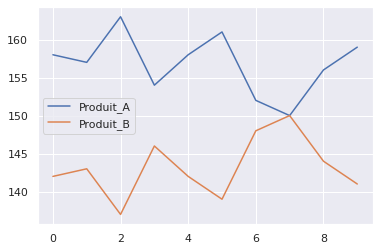

In [35]:
plt.plot(results['Produit_A'],label='Produit_A')
plt.plot(results['Produit_B'],label='Produit_B')
plt.legend()

On observe que le produit B est légèrement meilleur que le produit A sur notre population de 300 agents répartis sur les 5 profils.

Explications :
Il y a 5 profils : prix, qualité, promophiles, inertiels,équilibrés.
Il n'y a pas de promotion, ce qui ramène les promophiles à des équilibrés, donc 2/5è des agents s’intéressent plus au produit B puisque le rapport qualité prix est meilleur pour B : $ 0.5/10 > 0.7/12$. Les profils qualité vont de préférence prendre les produits de meilleure qualité (donc B). Seuls les agents prix vont s’intéresser avant tout au produit A car il est moins cher.

Réalisons une nouvelle expérience sur 100 pas de temps à graine aléatoire fixée (pour la comparaison).

In [36]:
np.random.seed(42)
#On fait la simulation
cat_0 = Category("catégorie 0",[Pack("Produit_A", 100, 0.5, 1), Pack("Produit_B", 120, 0.6, 1)])
smaGuerreDesPrix = SMA([cat_0],300,100)
smaGuerreDesPrix.initialize()
smaGuerreDesPrix.run()
#On récupère les informations
chiffreAffaires = smaGuerreDesPrix.revenues
favoris = smaGuerreDesPrix.getFavorites()

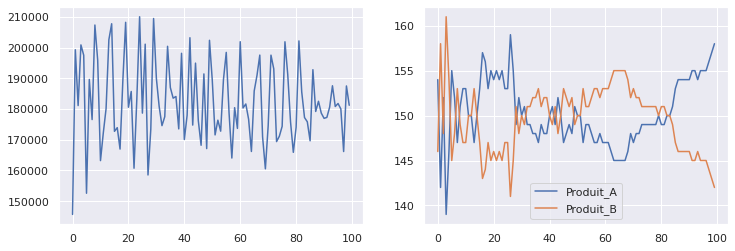

In [37]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(chiffreAffaires)
for k in favoris.keys():
    axs[1].plot(favoris[k],label=k)
axs[1].legend()

Les rapports qualité/prix des produits sont similaires (0.5/100 = 0.6/120). On observe qu'aucun des deux produits ne se démarque, ils ont une part de marché équivalente et sont en concurrence directe. De plus ce sont des produits très similaires, si l'un des produits effectue une promotion (temporaire) ou change son prix (définitif jusqu'à l'éventuel prochain changement) il absorbe un partie considérable des parts de marché de son concurrent. 

C'est ce qu'on montre dans une simulation avec une baisse du prix du produit A uniquement.

Un changement de prix définitif, qui n'est pas une promotion, s'effectue avec la méthode `reducePrice(pourcentage, tick d'effet, produit)` ou `raisePrice(pourcentage, tick d'effet, produit)`. ce qui donne par exemple `reducePrice(20, 30, 0, 0)`.

In [38]:
np.random.seed(42)
#On fait la simulation
cat_0 = Category("catégorie 0",[Pack("Produit_A", 100, 0.5, 1), Pack("Produit_B", 120, 0.6, 1)])
smaGuerreDesPrix = SMA([cat_0],300,100)
smaGuerreDesPrix.initialize()
#On indique à quel moment à lieu la baisse de prix ()
smaGuerreDesPrix.reducePrice(40, 30, 0, 0)
smaGuerreDesPrix.run()
#On récupère les informations
chiffreAffaires = smaGuerreDesPrix.revenues
favoris = smaGuerreDesPrix.getFavorites()

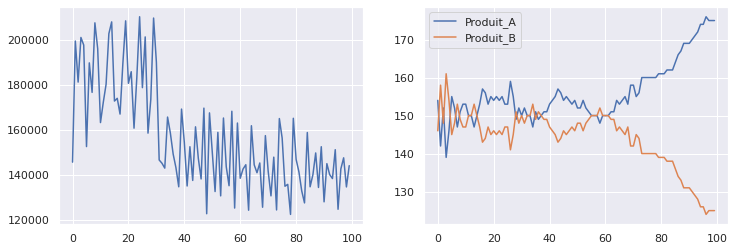

In [39]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(chiffreAffaires)
for k in favoris.keys():
    axs[1].plot(favoris[k],label=k)
axs[1].legend()

On observe une augmentation des parts de marché de 33% pour le produit A et une baisse de 33% pour le produit B. Les produits qui avaient des parts de marché équivalente ont maintenant respectivement 2/3 et 1/3 des parts de marché. 

Finalement on réalise une simulation qui illustre la _guerre des prix_, c'est à dire que le prix du produit B baisse ce qui entraîne une baisse du prix du produit A qui entraîne à son tour une baisse du produit B etc. 
Dans une telle situation tous les produits sont "perdants". On peut l'observer par la baisse du chiffre d'affaires.

In [40]:
np.random.seed(42)
#On fait la simulation
cat_0 = Category("catégorie 0",[Pack("Produit_A", 100, 0.5, 1), Pack("Produit_B", 120, 0.6, 1)])
smaGuerreDesPrix = SMA([cat_0],300,100)
smaGuerreDesPrix.initialize()
#On indique à quel moment à lieu la baisse de prix ()
smaGuerreDesPrix.reducePrice(20, 10, 0, 0)
smaGuerreDesPrix.reducePrice(20, 20, 0, 1)
smaGuerreDesPrix.reducePrice(20, 30, 0, 0)
smaGuerreDesPrix.reducePrice(20, 40, 0, 1)
# smaGuerreDesPrix.reducePrice(20, 50, 0, 1)
# smaGuerreDesPrix.reducePrice(20, 60, 0, 1)
smaGuerreDesPrix.run()
#On récupère les informations
chiffreAffaires = smaGuerreDesPrix.revenues
favoris = smaGuerreDesPrix.getFavorites()

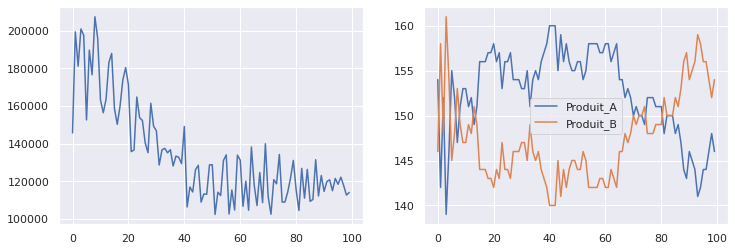

In [41]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(chiffreAffaires)
for k in favoris.keys():
    axs[1].plot(favoris[k],label=k)
axs[1].legend()

## Les paramètres du modèle
Le modèle dispose de 7 paramètres : prix, qualité, promophile, sat_alpha, phi, c et inertie. 
Ces paramètres sont tous des paramètres optionels qui peuvent être modifiés via la méthode `initialize()`. Par défaut leur valeur est fixe. 

`Prix, qualité, promophile, inertie` sont les paramètres qui gèrent l'importance globale pour tous les agents du prix, de la qualité, de la promotion et de l'inertie. Ces paramètres varient selon le type de magasin. Par exemple, est-ce un magasin discount où les prix sont plutôt bas (le paramètre prix sera élevé) ou un magasin de luxe où le prix importe peu (le paramètre prix sera faible). 

Par exemple un prix à 1 avec les autres valeurs à 0 signifierais que les agents prennent tous uniquement en compte le prix des produits pour déterminer leurs achats. Le prix à 1 et l'inertie à 10 signifierait que tous les agents sont très inertiels et accord peu d'importance au prix. 

`sat_alpha` correspond au paramètre de régulation de la pente de la fonction de saturation (utilisé dans le calcul de la quantité). Plus il est élevé plus la pente est douce et inversement. 

`C` est la borne supérieure de cette fonction de saturation.

La fonction de saturation est utilisée dans le calcul du nombre de packs que l'agent achète. Les agents attribuent des scores selon une fonction d'utilité. Ces scores permettent aux agents de choisir le produit qu'ils vont acheter. Enfin le produit qui a été choisi est comparé à un produit de référence unique pour chaque agent. La différence est reportée dans la fonction de saturation qui vient moduler la quantité de packs achetée. Cette fonction traduit, que plus le pack est intéressant (selon les caractéristiques de l'agent) par rapport à ce qu'il a l'habitude d'acheter plus l'agent achète un grand nombre de ce pack. À l'inverse plus le produit est peu intéressant moins l'agent achète de packs.

Text(0, 0.5, 'Multiplicateur de quantité')

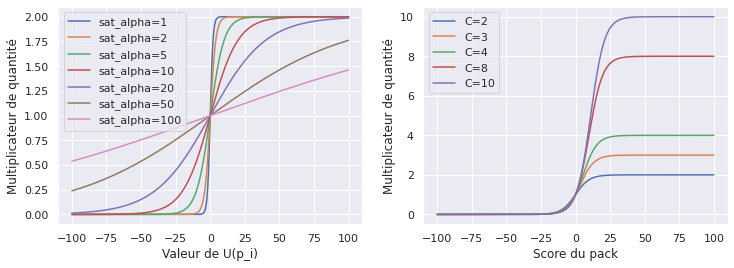

In [42]:
# Exemples de différents paramètres C et sat_alpha
# Définition de la fonction de saturation
def sat(U,alpha,c):
        x = (U)
        y = math.log(c-1)
        return c / (1 + math.exp(-x/alpha+y))

# Affichage de la fonction de saturation selon sat_alpha
fig,axs = plt.subplots(1,2,figsize=(12,4))
for alpha in [1,2,5,10,20,50,100]:
    c=2
    res = np.array(np.zeros(len(np.arange(-100,100,0.01))))
    cpt = 0
    for i in np.arange(-100,100,0.01):
        res[cpt] = sat(i,alpha,c)
        cpt+=1
    axs[0].plot(np.arange(-100,100,0.01),res)
axs[0].legend(("sat_alpha=1","sat_alpha=2","sat_alpha=5","sat_alpha=10","sat_alpha=20","sat_alpha=50","sat_alpha=100") )
axs[0].set_xlabel("Valeur de U(p_i)")
axs[0].set_ylabel("Multiplicateur de quantité")

# Affichage de la fonction de saturation selon C
for c in [2,3,4,8,10]:
    alpha = 5
    res = np.array(np.zeros(len(np.arange(-100,100,0.01))))
    cpt = 0
    for i in np.arange(-100,100,0.01):
        res[cpt] = sat(i,alpha,c)
        cpt+=1
    axs[1].plot(np.arange(-100,100,0.01),res)
axs[1].legend(("C=2","C=3","C=4","C=8","C=10") )
axs[1].set_xlabel("Score du pack")
axs[1].set_ylabel("Multiplicateur de quantité")

Finalement `Phi` correspond à l'intensité de l'aversion à la perte. Phi = 0.5 équivaut à : l'impact négatif de perdre 1€ est 1.5 fois plus fort que l'impact positif de gagner 1€. Phi = 2 correspondrait à ce même ratio égal à 3 etc..

#### Simulations pour différents paramètres

Voici quelques exemples de changement de paramètres. On reprend la catégorie de produit constituée de 8 produits utilisée précédemment. 

In [1]:
test = generate_pack_categorie("Bananes")
sma = SMA([test],300,100)

NameError: name 'SMA' is not defined

Les paramètres de l'environnement sont passés via la méthode `initialize()`
Les paramètres sont price, quality, promophile, sat_alpha, phi, c, inertia

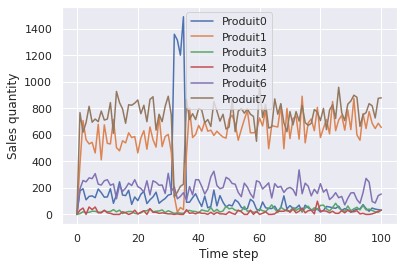

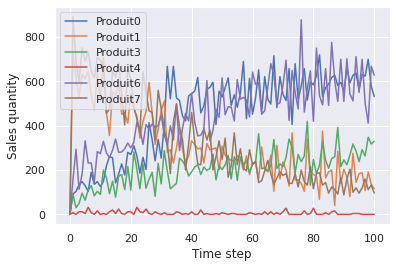

0

In [44]:
sma.initialize(inertia = 0)
sma.makePromo(0,40,(30,34),"Bananes","Bananes0")
sma.run()
sma.showPacksSales()
sma.initialize(inertia = 10)
sma.makePromo(0,40,(30,34),"Bananes","Bananes0")
sma.run()
sma.showPacksSales()

Sur la première figure on voit qu'il n'y a plus de fidélisation car une fois la promotion sur `Produit0` terminé les agents reviennent à leurs habitudes. De plus les agents se dirigent vers le pack ayant le meilleur rapport qualité/prix, il n'y a plus de "force des habitudes" qui les retiendrait de changer de produit.

Sur la seconde figure on voit que la promotion n'a plus d'impact, les ventes du pack `produit0` n'augmentent pas. Cela signifie qu'un agent habitué à une marque accorde plus d'importance a n'acheter que des packs de cette marque plutôt qu'un pack en promotion qui proposerait un avantage de prix. 

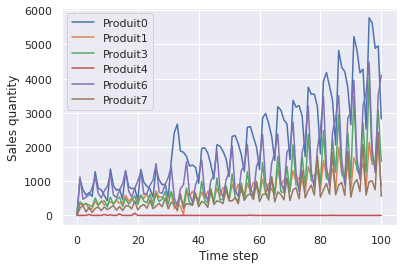

0

In [45]:
sma.initialize(price=10, quality=10, promophile=10, sat_alpha=1, phi=0.3, c = 2, inertia = 10)
sma.makePromo(0,40,(30,34),"Bananes","Bananes0")
sma.run()
sma.showPacksSales()

Un paramètre `sat_alpha` trop petit par rapport aux autres induit qu'une simple fidélisation suffit a faire en sorte que les agents achètent en plus grande quantité (calcul dans la fonction de saturation). Etant donné que les agents se basent sur leurs historiques pour déterminer la quantité d'achat, le nombre de ventes ne fait qu'augmenter.

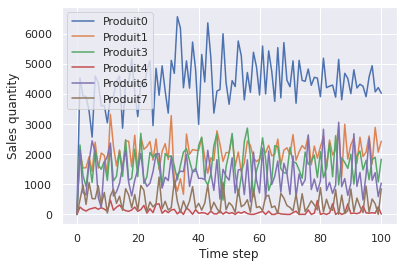

0

In [46]:
sma.initialize(price=2, quality=0, promophile=1, sat_alpha=100, phi=0.3, c = 2, inertia = 1)
sma.makePromo(0,40,(30,34),"Bananes","Bananes0")
sma.run()
sma.showPacksSales()

La qualité n'ayant plus d'impact on observe que certains produits (les plus chers) ne sont plus du tout achetés.

### Conclusion

Au travers de cette feuille jupyter nous avons pu montrer certaines simulations parmis les plus intéressantes et expliciter le paramétrage du modèle. Sa force est qu'il est adaptatif, cependant certains ensemble de pramètres ne reflètent pas du tout la réalité. Il reste encore différentes simulation possible montrant des effets intéressants, il n'est cependant pas possible de tout intégrer à l'article. Ces différentes simulation sont disponibles dans la feuille jupyter "_BUILDING_"